<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_4_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80(Logistic_Regression)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#n_samples : 표본데이터수 / n_features : 독릭변수 수 / n_informative : 독립변수 중 다른독립변수와 상관 관계가 있는 성분의 수 / n_redundant : 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 성분의 수 / random_state : 난수발생 시드
sample = 1000
X,y = make_classification(n_samples=sample, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1) 

In [ ]:
help(make_classification)

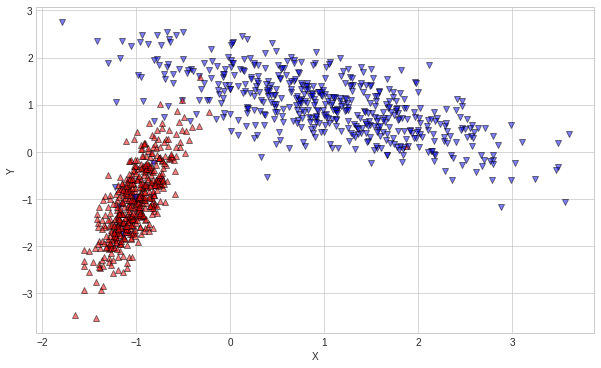

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_xlabel('X')
ax.set_ylabel('Y')

for i in range(sample):
  if y[i] == 0:
    ax.scatter(X[i,0],X[i,1], edgecolors='k', alpha = 0.5, marker = '^', color = 'r')
  else :
    ax.scatter(X[i,0],X[i,1], edgecolors='k', alpha = 0.5, marker = 'v', color = 'b')

plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.98375
0.975


In [ ]:
#valid of scoring ['accuracy(정확성)','adjust_rand_score(두집단간의 유사성 점수)','average_precision(평균정확도)','f1','log_loss','mean_absolute_error','mean_squared_error','precision','r2','recall','roc_auc',]

scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(scores.mean())

0.9810000000000001


In [ ]:
help(plt.pcolormesh)

In [ ]:
model.intercept_, model.coef_

(array([-0.05966151]), array([[2.62012693, 2.6263578 ]]))

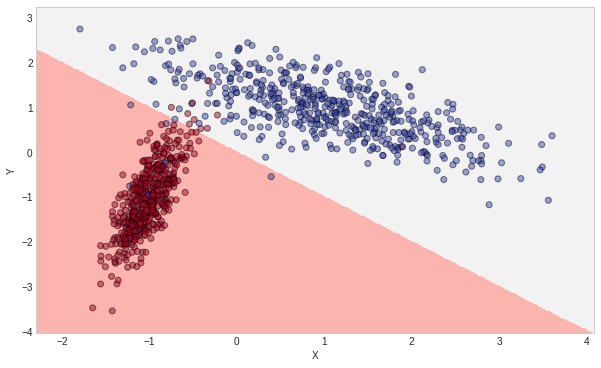

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

#print(x_min, x_max, y_min, y_max)

#meshgrid : 직사각형의 그리드 생성
#참고 : https://seong6496.tistory.com/129
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.02), np.arange(y_min,y_max,0.02))

crav = np.c_[xx.ravel(), yy.ravel()]
#print(crav[:,0])

# ravel : 다차원 배열(array)을 1차원 배열로 평평하게 펴줌
# np.c_ : 두 배열을 가로 방향(왼쪽에서 오른쪽으로)으로 합치기
Z = model.predict(crav)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize = (10,6))


plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0],X[:,1], c=np.abs( y - 1), edgecolors = 'k', alpha = 0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks()
plt.yticks()

plt.show()

 

## 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


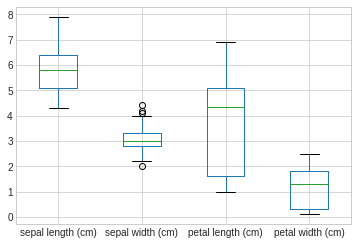

In [ ]:
iris_df.boxplot();

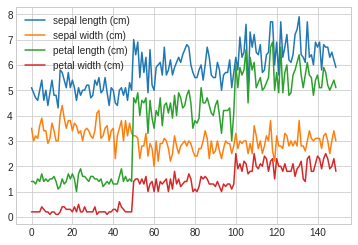

In [ ]:
iris_df.plot()

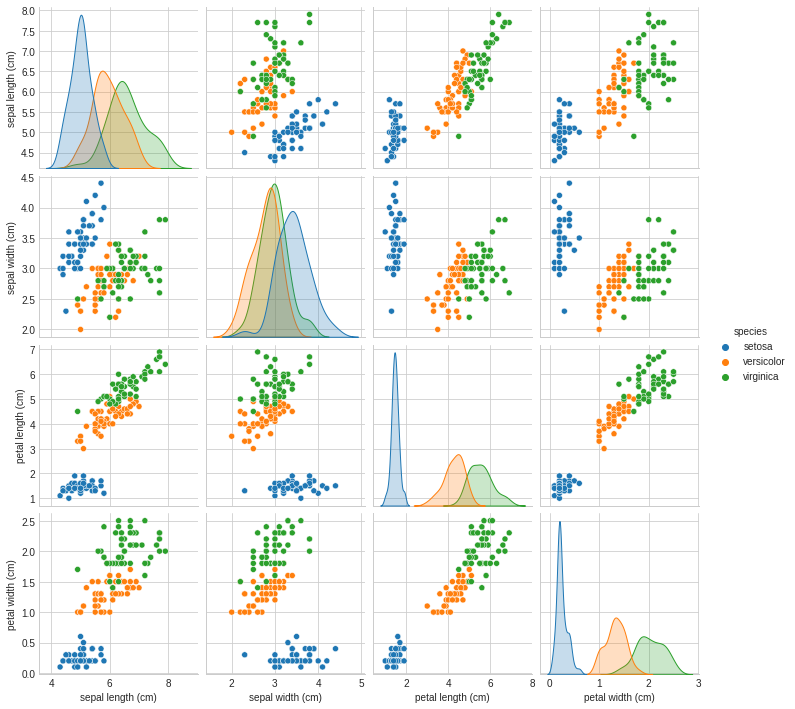

In [ ]:
import seaborn as sns
sns.pairplot(iris_df, hue = 'species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size=0.2, random_state = 1, stratify=iris.target)

In [ ]:
from sklearn.linear_model import LogisticRegression

#penalty('l1', 'l2', 'elasticnet', 'none')

# solver('newton-cg', 'lbfgs(준-뉴턴 방식 의 최적화 알고리즘)', 'liblinear', 'sag', 'saga')
## 작은 dataset의 경우 'liblinear'이 좋은 선택일 수 있으며, 'sag'과 'saga'는 큰 dataset에서 더욱 빠르게 동작한다.
## Multiclass problem의 경우, 'newton-cg', 'sag', 'saga', 'lbfgs'만이 multinomial loss를 다룰 수 있다.
## 'liblinear'은 one-versus-rest scheme에서만 동작한다.

model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [ ]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

print(X[0])
print(y[0])

[1.5 0.4]
0


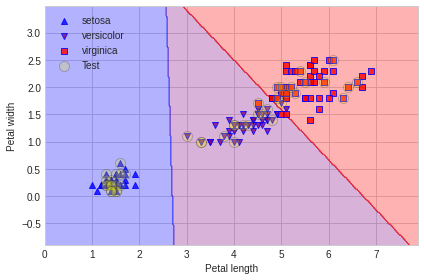

In [ ]:
from matplotlib.colors import ListedColormap

X1_min, X1_max = X[:,0].min() - 1, X[:,0].max() + 1
X2_min, X2_max = X[:,1].min() - 1, X[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, 0.02),np.arange(X2_min, X2_max, 0.02))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = iris.target_names
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')

#len(np.unique(y))

cmap = ListedColormap(colors[:len(np.unique(y))])

#contour, contourf 등차선 그래프
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0], y=X[y == cl,1], alpha=0.8, c=colors[idx], marker = markers[idx], label = species[cl], edgecolor='b')

X_comb_test, y_comb_test = X[range(105,150), :], y[range(105,150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1], c = 'yellow', edgecolor='k', alpha = 0.2, linewidth=1, marker='o', s=100, label='Test')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()


In [ ]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty':['l1','l2'], 'C' : [2.0, 2.2, 2.4, 2.6, 2.8]}]
gs = GridSearchCV(estimator=LogisticRegression(), param_grid = param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [ ]:
result = gs.fit(iris.data, iris.target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [ ]:
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)
print(pd.DataFrame(result.cv_results_))

LogisticRegression(C=2.4)
0.9800000000000001
{'C': 2.4, 'penalty': 'l2'}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000272      0.000053         0.000000        0.000000     2.0   
1       0.049858      0.005007         0.000595        0.000034     2.0   
2       0.000249      0.000041         0.000000        0.000000     2.2   
3       0.049193      0.005015         0.000557        0.000032     2.2   
4       0.000260      0.000029         0.000000        0.000000     2.4   
5       0.050816      0.006337         0.000596        0.000062     2.4   
6       0.000242      0.000041         0.000000        0.000000     2.6   
7       0.052465      0.006796         0.000608        0.000035     2.6   
8       0.000513      0.000745         0.000000        0.000000     2.8   
9       0.046466      0.005909         0.000559        0.000064     2.8   

  param_penalty                       params  split0_test_score  \
0            l1  {'C': 2.0, 'penal

## 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer.keys()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
import pandas as pd

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target

cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<function matplotlib.pyplot.tight_layout>

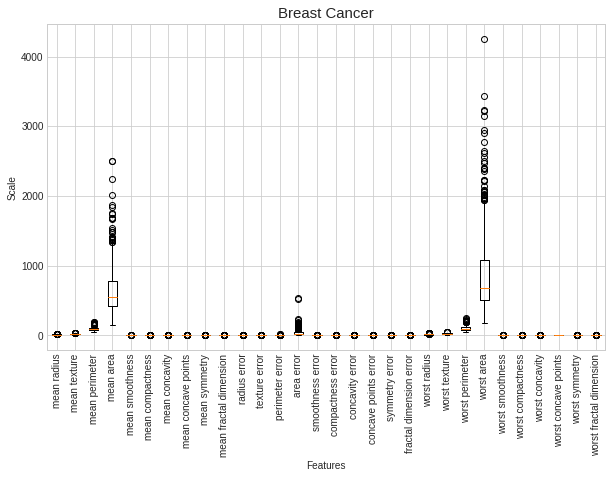

In [ ]:
from IPython.core.pylabtools import figsize
fig = plt.figure(figsize=[10,6])
plt.title('Breast Cancer', fontsize='15')
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout

## 유방암 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9624413145539906
0.9230769230769231


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
#StandardScaler(표준화)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X,y = load_boston(return_X_y=True)
X_trian, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_loss'))
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(loss='squared_loss'))])

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7392017399598305
0.7550245394906325


## 붓꽃 데이터에 대한 SGD 분류

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9285714285714286
0.9736842105263158


## 유방암 데이터에 대한 SGD 분류

In [ ]:
X,y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9835680751173709
0.9440559440559441
